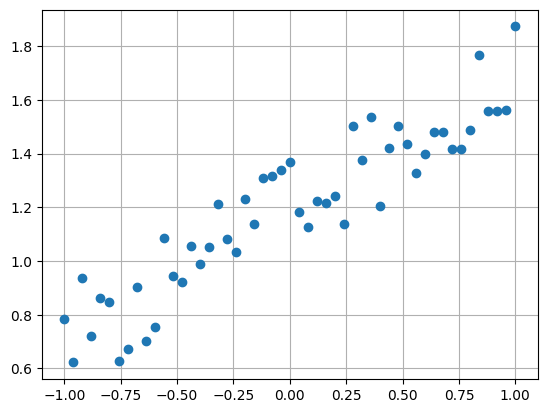

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path

### GD VS. Momentum
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5*x + 1.0
y_train = f(x_train) + 0.4*np.random.rand(len(x_train))
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [115]:
np.random.seed(303)
shuffle_id = np.arange(0, len(x_train))
np.random.shuffle(shuffle_id)
x_train = x_train[shuffle_id]
y_train = y_train[shuffle_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5*(w[0]*x_set[i] + w[1] - y_set[i])**2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0]*x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    : param batch_size : The batch size
    : param features : List of features
    : param labels : List of labels
    : param Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [116]:
batch_size = 10
lr = 0.3
MaxEpochs = 51
alpha = .9
epsilon = lr
delta = 1e-7

In [117]:
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.44872348 1.21532304] 0.007001874840513126
20 [0.45562947 1.20122955] 0.0067791977029653455
30 [0.46004224 1.19937495] 0.006755356671840006
40 [0.46018514 1.19943596] 0.00675528574118586
50 [0.46018753 1.19942991] 0.006755253222853033


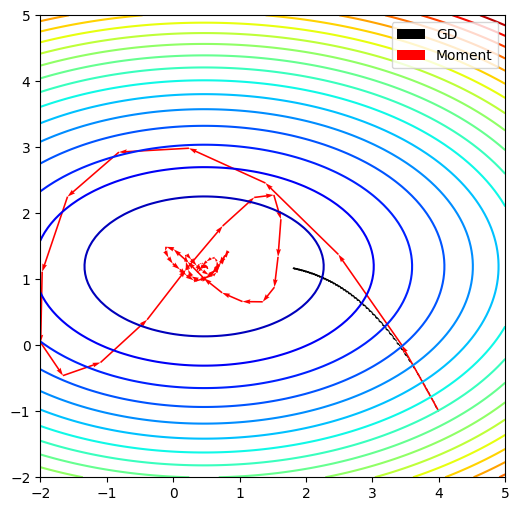

In [118]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Moment'])
plt.show()

In [119]:
MaxEpochs = 51
batch_size = 10

#Adagrad
epsilon = 0.25
delta = 1e-6

#RMSProp
rho = 0.9

In [120]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon/(delta+np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [ 3.75000028 -0.75000008] 3.7664560722638654
20 [ 3.58275768 -0.58275738] 3.26966269513775
30 [ 3.45113731 -0.45113695] 2.9051715796099478
40 [ 3.34055236 -0.34055194] 2.616967760286557
50 [ 3.24427911 -0.24427865] 2.3794721714125338


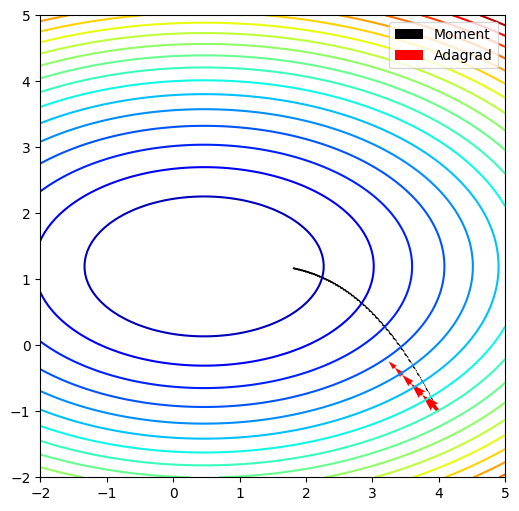

In [123]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['Moment', 'Adagrad'])
plt.show()

RMSProp

In [124]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_RMSProp = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        path_RMSProp.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r * rho + (1-rho) * grad * grad
        delw = -epsilon/(np.sqrt(delta+r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [ 3.20943551 -0.20943097] 2.296587270786556
20 [2.74716207 0.2528444 ] 1.3517561424068623
30 [2.42290815 0.57709958] 0.8607446695991635
40 [2.18198472 0.81802396] 0.5876035437521456
50 [1.99937306 1.00063636] 0.43264953577092463


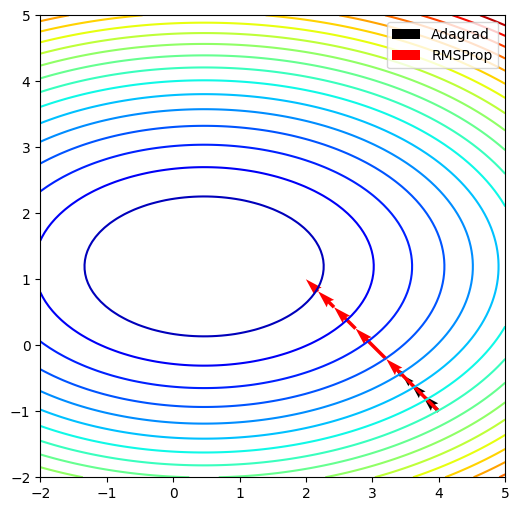

In [125]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_RMSProp
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['Adagrad', 'RMSProp'])
plt.show()

In [126]:
MaxEpochs = 51
batch_size = 10
epsilon = 0.1
delta = 1e-6

#Adam
delta = adam = 1e-8
rho1 = 0.9
rho2 = 0.999

#RMSProp
rho = 0.9

Adam

In [127]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
s = np.zeros_like(w0)
path_adam = []
t = 0
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho1*s + (1 - rho1)* grad
        r = rho2*r + (1 - rho2)* grad * grad 
        t += 1
        s2 = s/(1-rho1**t)
        r2 = r/(1-rho2**t)
        delw = -epsilon/(delta+np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.83772346 2.16227735] 0.49838305640923614
20 [1.64734529 1.35265532] 0.2606643301571222
30 [1.46685909 1.53314156] 0.23720091576349533
40 [1.50690703 1.49309361] 0.23862018900712761
50 [1.49799958 1.50200107] 0.23811774384150128


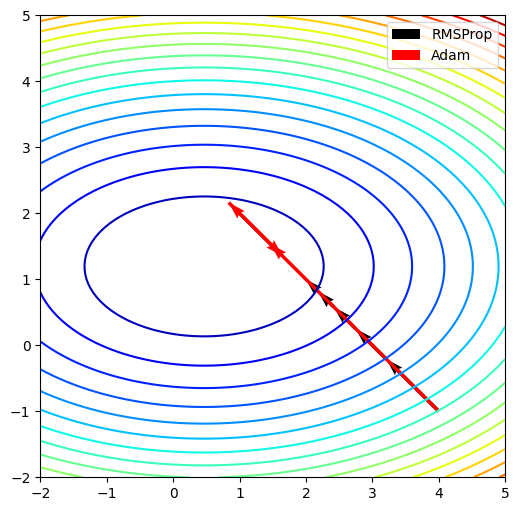

In [128]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_RMSProp
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['RMSProp', 'Adam'])
plt.show()